In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
symptom_df = pd.read_csv("C:/Users/M F Mohamed Ajmal/OneDrive/Desktop/project/healthcare_project/DiseaseAndSymptoms.csv")
precaution_df = pd.read_csv("C:/Users/M F Mohamed Ajmal/OneDrive/Desktop/project/healthcare_project/Disease precaution.csv")

# Clean column names
symptom_df.columns = [c.strip().lower().replace(" ", "_") for c in symptom_df.columns]
precaution_df.columns = [c.strip().lower().replace(" ", "_") for c in precaution_df.columns]

# Combine all symptom columns into one
symptom_cols = [c for c in symptom_df.columns if "symptom" in c]
symptom_df["symptoms"] = symptom_df[symptom_cols].astype(str).apply(lambda x: ",".join(x.dropna().values), axis=1)

# Clean text
symptom_df["symptoms"] = symptom_df["symptoms"].apply(lambda x: re.sub(r"[^a-zA-Z, ]", "", x.lower()))
symptom_df["disease"] = symptom_df["disease"].astype(str).str.strip().str.lower()

# Drop empty rows
symptom_df.dropna(subset=["symptoms", "disease"], inplace=True)

print("✅ Data cleaned successfully.")
print(symptom_df.head())


✅ Data cleaned successfully.
            disease   symptom_1              symptom_2              symptom_3  \
0  fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  fungal infection     itching              skin_rash    dischromic _patches   
4  fungal infection     itching              skin_rash   nodal_skin_eruptions   

              symptom_4 symptom_5 symptom_6 symptom_7 symptom_8 symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  symptom_10 symptom_

In [3]:
X = symptom_df["symptoms"]
y = symptom_df["disease"]

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

vectorizer = TfidfVectorizer(max_features=2000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [4]:
lr = LogisticRegression(max_iter=1000)
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=200, random_state=42)

voting_model = VotingClassifier(
    estimators=[("lr", lr), ("nb", nb), ("rf", rf)],
    voting="hard"
)

voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)

print("🎯 Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


🎯 Accuracy: 100.0 %
                                         precision    recall  f1-score   support

(vertigo) paroymsal  positional vertigo       1.00      1.00      1.00        24
                                   acne       1.00      1.00      1.00        24
                                   aids       1.00      1.00      1.00        24
                    alcoholic hepatitis       1.00      1.00      1.00        24
                                allergy       1.00      1.00      1.00        24
                              arthritis       1.00      1.00      1.00        24
                       bronchial asthma       1.00      1.00      1.00        24
                   cervical spondylosis       1.00      1.00      1.00        24
                            chicken pox       1.00      1.00      1.00        24
                    chronic cholestasis       1.00      1.00      1.00        24
                            common cold       1.00      1.00      1.00        24
       

In [5]:
department_map = {
    'cold': 'General Physician',
    'flu': 'General Physician',
    'fever': 'General Physician',
    'typhoid': 'General Physician',
    'covid': 'General Physician',
    'dengue': 'General Physician',
    'malaria': 'Infectious Disease Specialist',
    'asthma': 'Pulmonologist',
    'bronchitis': 'Pulmonologist',
    'pneumonia': 'Pulmonologist',
    'tuberculosis': 'Pulmonologist',
    'stomach infection': 'Gastroenterologist',
    'ulcer': 'Gastroenterologist',
    'food poisoning': 'Gastroenterologist',
    'hepatitis': 'Gastroenterologist',
    'allergy': 'Dermatologist',
    'chicken pox': 'Dermatologist',
    'eczema': 'Dermatologist',
    'hypertension': 'Cardiologist',
    'heart attack': 'Cardiologist',
    'migraine': 'Neurologist',
    'parkinson': 'Neurologist',
    'depression': 'Psychiatrist',
    'anxiety': 'Psychiatrist',
    'arthritis': 'Orthopedic',
    'anemia': 'Hematologist'
}


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = voting_model.predict(X_test)

# Overall accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Accuracy: 1.0
[[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]
                                         precision    recall  f1-score   support

(vertigo) paroymsal  positional vertigo       1.00      1.00      1.00        24
                                   acne       1.00      1.00      1.00        24
                                   aids       1.00      1.00      1.00        24
                    alcoholic hepatitis       1.00      1.00      1.00        24
                                allergy       1.00      1.00      1.00        24
                              arthritis       1.00      1.00      1.00        24
                       bronchial asthma       1.00      1.00      1.00        24
                   cervical spondylosis       1.00      1.00      1.00        24
                            chicken pox       1.00      1.00      1.00        24
                   

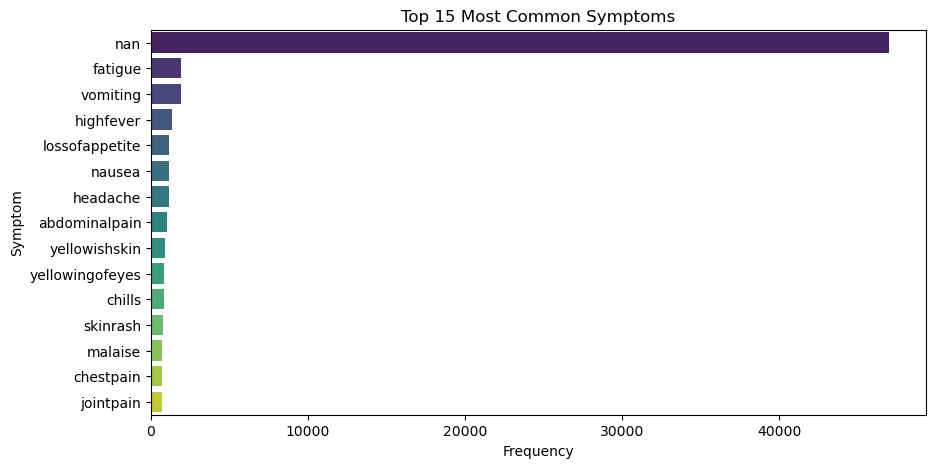

In [10]:
# Cell 9: Most frequent symptoms
symptom_list = [s.strip() for row in symptom_df['symptoms'] for s in row.split(',') if s.strip()]
symptom_freq = pd.Series(symptom_list).value_counts().head(15)

plt.figure(figsize=(10, 5))
sns.barplot(x=symptom_freq.values, y=symptom_freq.index, palette='viridis')
plt.title('Top 15 Most Common Symptoms')
plt.xlabel('Frequency')
plt.ylabel('Symptom')
plt.show()


In [6]:
def get_precautions(disease_name):
    row = precaution_df[precaution_df['disease'].str.lower() == disease_name.lower()]
    if not row.empty:
        return [row.iloc[0][col] for col in precaution_df.columns if "precaution" in col.lower() and pd.notna(row.iloc[0][col])]
    return ["No specific precautions available."]

def predict_disease(symptoms_input):
    cleaned = re.sub(r'[^a-zA-Z, ]', '', symptoms_input.lower()).strip()
    X_input = vectorizer.transform([cleaned])
    pred_encoded = voting_model.predict(X_input)[0]
    final_disease = encoder.inverse_transform([pred_encoded])[0]
    return final_disease

def get_severity_message(days):
    if days <= 2:
        return "🟢 Mild: Usually resolves in 2–3 days."
    elif 3 <= days <= 5:
        return "🟡 Moderate: Should visit doctor if no improvement."
    else:
        return "🔴 Severe: Consult a doctor immediately!"


In [14]:
def predict_disease_with_confidence(symptoms_input):
    cleaned = normalize_symptoms(re.sub(r'[^a-zA-Z, ]', '', symptoms_input.lower()).strip())
    X_input = vectorizer.transform([cleaned])
    probs = voting_model.predict_proba(X_input)[0]
    top_indices = np.argsort(probs)[::-1][:3]
    top_diseases = encoder.inverse_transform(top_indices)
    return list(zip(top_diseases, probs[top_indices]))


In [8]:
print("👋 Hi, I’m your Health Assistant! Let’s begin your check-up.\n")

symptoms = input("🩹 Please enter your symptoms (comma-separated): ")
days = int(input("📅 How many days have you had these symptoms? "))

predicted_disease = predict_disease(symptoms)
department = department_map.get(predicted_disease.lower(), "General Physician")
precautions = get_precautions(predicted_disease)
severity_message = get_severity_message(days)

print("\n============================================")
print(f"🦠 Predicted Disease: {predicted_disease.title()}")
print(f"🏥 Department to Visit: {department}")
print(f"⏱️ Duration: {days} days")
print(f"⚕️ Severity: {severity_message}")
print("\n💊 Recommended Precautions:")
for i, p in enumerate(precautions, 1):
    print(f"  {i}. {p}")
print("============================================")


👋 Hi, I’m your Health Assistant! Let’s begin your check-up.



🩹 Please enter your symptoms (comma-separated):  cold,fever
📅 How many days have you had these symptoms?  3



🦠 Predicted Disease: Common Cold
🏥 Department to Visit: General Physician
⏱️ Duration: 3 days
⚕️ Severity: 🟡 Moderate: Should visit doctor if no improvement.

💊 Recommended Precautions:
  1. drink vitamin c rich drinks
  2. take vapour
  3. avoid cold food
  4. keep fever in check


In [9]:
import joblib

joblib.dump(voting_model, "disease_modelv3.pkl")
joblib.dump(vectorizer, "tfidf_vectorizerv3.pkl")
joblib.dump(encoder, "label_encoderv3.pkl")

print("✅ Model and encoders saved successfully.")


✅ Model and encoders saved successfully.
